In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles

Note: you may need to restart the kernel to use updated packages.


In [2]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)

# convert to numeric what is possible
results_2019 = results_2019.apply(pd.to_numeric, errors='coerce').fillna(results_2019)
results_2020 = results_2020.apply(pd.to_numeric, errors='coerce').fillna(results_2020)
results_2021 = results_2021.apply(pd.to_numeric, errors='coerce').fillna(results_2021)

# replace NaNs with empty strings for easier searchability
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)

C:\Users\cseke\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


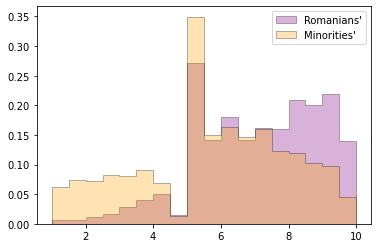

In [3]:
# Plot the distribution of the Romanian exam grades.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] > -1)]
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] > -1)]

plt.hist(romanian_only_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
plt.hist(romanian_plus_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
plt.legend(["Romanians'", "Minorities'"])
plt.show()

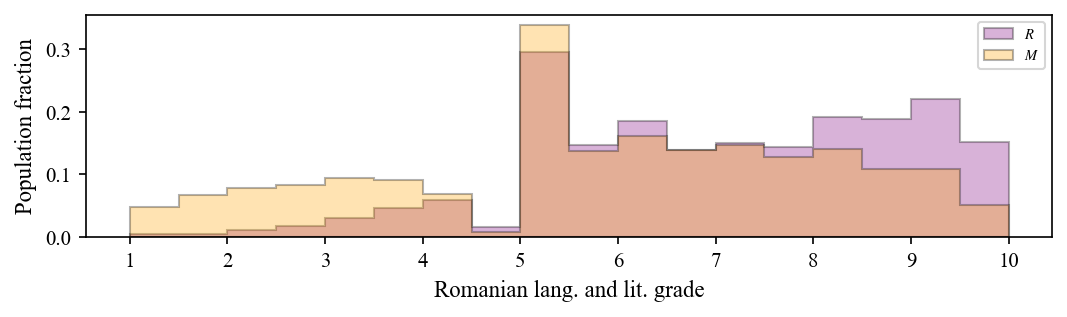

In [4]:
# remove invalid rows from the 2019 data (grade cell contains "DISQUALIFIED" etc. strings)
results_2019_2 = results_2019[results_2019[['romanian_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
# combine the three years
results_all = pd.concat([results_2019_2, results_2020, results_2021], ignore_index=True, sort=False)


# Plot the distribution of the Romanian exam grades.

romanian_only_results = results_all[(results_all['mother_tongue'] == '') & (results_all['romanian_written_final'] > -1)]
romanian_plus_results = results_all[(results_all['mother_tongue'] != '') & (results_all['romanian_written_final'] > -1)]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(figsize=(7,2), dpi=150)

    ax.hist(romanian_only_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    ax.hist(romanian_plus_results['romanian_written_final'].to_list(), bins=18, density=True, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
    
    ax.legend(["$\it{R}$", "$\it{M}$"])
    ax.set_xlabel("Romanian lang. and lit. grade", fontsize=11)
    ax.set_ylabel("Population fraction", fontsize=11)
    ax.set_xticks(np.arange(1,11))
    ax.set_xticklabels(np.arange(1,11), fontsize=10)
    ax.tick_params(axis='y', labelsize=10)


    plt.show()
    fig.savefig('../doc/plots/exp4_grade_distrib.png', bbox_inches='tight')

In [5]:
print(romanian_only_results['romanian_written_final'].mean())
print(romanian_plus_results['romanian_written_final'].mean())
print(romanian_only_results['romanian_written_final'].mean() - romanian_plus_results['romanian_written_final'].mean())

def cohen_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    s1 = np.std(x1, ddof=1)
    s2 = np.std(x2, ddof=1)
    pooled_std = np.sqrt((((n1 - 1) * s1 ** 2) + ((n1 - 1) * s1 ** 2)) / (n1 + n2 - 2))
    return (np.mean(x1) - np.mean(x2)) / pooled_std

print(cohen_d(romanian_only_results['romanian_written_final'].to_numpy(), romanian_plus_results['romanian_written_final'].to_numpy()))

7.0047186474705505
5.825183667566583
1.1795349799039672
0.46134467386811273


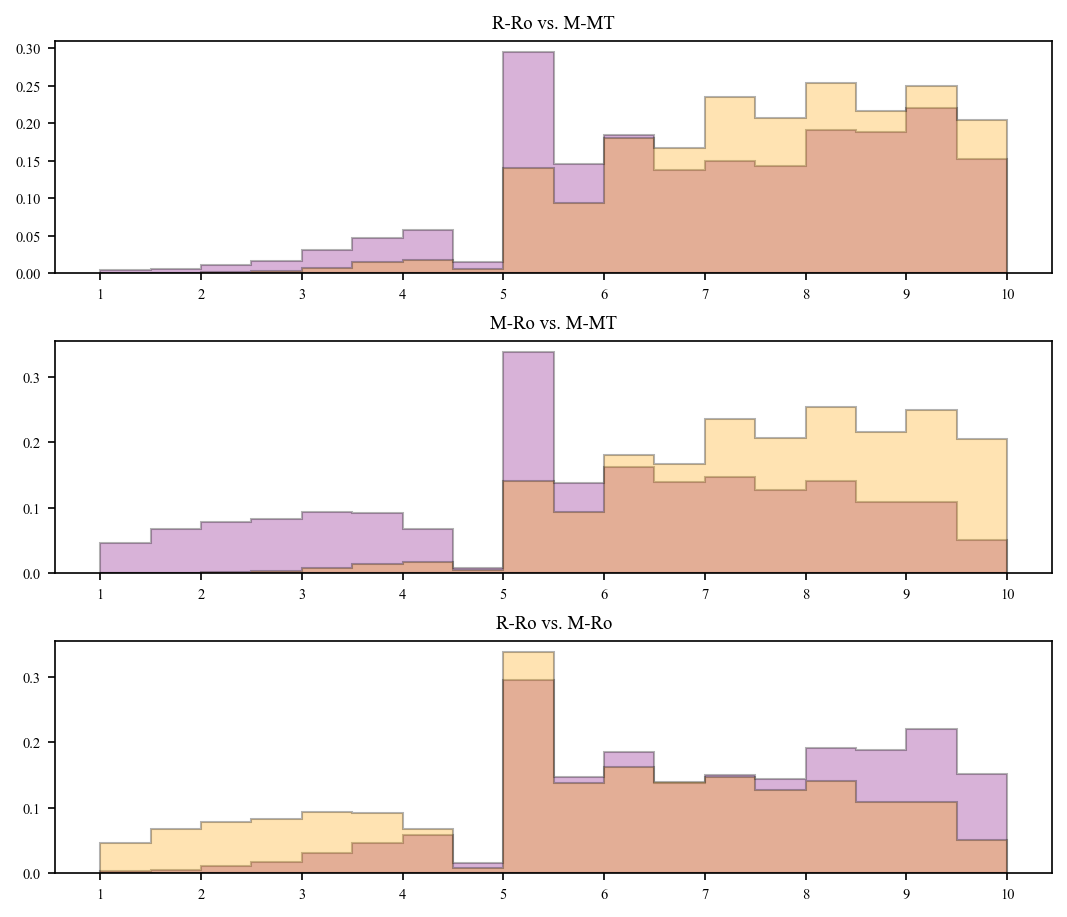

In [20]:
results_2019_filtered = results_2019[results_2019[['romanian_written_final', 'mother_tongue_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
results_2020_filtered = results_2020[results_2020[['romanian_written_final', 'mother_tongue_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_2021_filtered = results_2021[results_2021[['romanian_written_final', 'mother_tongue_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_filtered = pd.concat([results_2019_filtered, results_2020_filtered, results_2021_filtered])

results_filtered_r = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x == '').all(1)]
results_filtered_m = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x != '').all(1)]

results_filtered_m = results_filtered_m[results_filtered_m[['mother_tongue_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, axs = plt.subplots(3, figsize=(7,6), dpi=150)

    axs[0].hist(results_filtered_r['romanian_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    axs[0].hist(results_filtered_m['mother_tongue_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
   
    axs[1].hist(results_filtered_m['romanian_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    axs[1].hist(results_filtered_m['mother_tongue_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
    
    axs[2].hist(results_filtered_r['romanian_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    axs[2].hist(results_filtered_m['romanian_written_final'].to_list(), density=True, bins=18, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
    

    axs[0].set_xticks(np.arange(1,11))
    axs[1].set_xticks(np.arange(1,11))
    axs[2].set_xticks(np.arange(1,11))
    axs[0].set_title('R-Ro vs. M-MT')
    axs[1].set_title('M-Ro vs. M-MT')
    axs[2].set_title('R-Ro vs. M-Ro')

    # ax.legend(["$\it{MT}$", "$\it{Ro}$"], loc='upper left')
    # ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    # ax.set_ylabel("Population fraction", fontsize=11)
    # ax.set_xticklabels(np.arange(1,11), fontsize=10)
    # ax.tick_params(axis='y', labelsize=10)


    plt.show()
    fig.savefig('../doc/plots/exp4_grade_distrib_min.png', bbox_inches='tight')

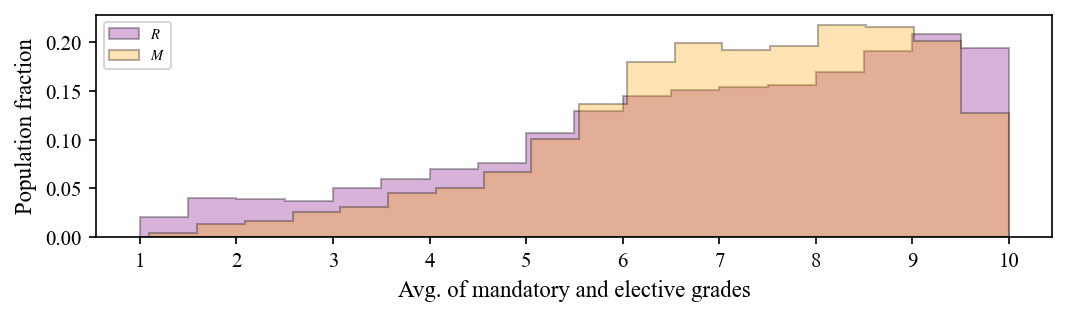

In [11]:
results_2019_filtered = results_2019[results_2019[['mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: np.isreal(x) or x == '').all(1)]
results_2020_filtered = results_2020[results_2020[['mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_2021_filtered = results_2021[results_2021[['mandatory_subject_written_final', 'elective_subject_written_final']].applymap(lambda x: (np.isreal(x) and (x >= 1)) or x == '').all(1)]
results_filtered = pd.concat([results_2019_filtered, results_2020_filtered, results_2021_filtered])

results_filtered.loc[:, 'mandatory_elective_average'] = results_filtered[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)
results_filtered_r = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x == '').all(1)]
results_filtered_m = results_filtered[results_filtered[['mother_tongue']].applymap(lambda x: x != '').all(1)]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(figsize=(7,2), dpi=150)

    ax.hist(results_filtered_r['mandatory_elective_average'].to_list(), bins=18, density=True, alpha = 0.3, color='purple', edgecolor='black', linewidth=1, histtype= "stepfilled")
    ax.hist(results_filtered_m['mandatory_elective_average'].to_list(), bins=18, density=True, alpha = 0.3, color='orange', edgecolor='black', linewidth=1, histtype= "stepfilled")
    
    ax.legend(["$\it{R}$", "$\it{M}$"], loc='upper left')
    ax.set_xlabel("Avg. of mandatory and elective grades", fontsize=11)
    ax.set_ylabel("Population fraction", fontsize=11)
    ax.set_xticks(np.arange(1,11))
    ax.set_xticklabels(np.arange(1,11), fontsize=10)
    ax.tick_params(axis='y', labelsize=10)


    plt.show()
    fig.savefig('../doc/plots/exp4_grade_distrib_spec.png', bbox_inches='tight')